In [57]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numba import njit
import matplotlib.colors as mcolors
import matplotlib.cm as cm

# Parámetros de la malla
N = 100  # Número de puntos en cada dirección
h = 2.0 / (N - 1)  # Tamaño de celda (cubre [-1.1, 1.1])

# Crear la malla
x = np.linspace(-1.1, 1.1, N)
y = np.linspace(-1.1, 1.1, N)
X, Y = np.meshgrid(x, y)

# Función de densidad de carga
rho = -X - Y

# Inicializar phi con valores aleatorios en el interior del disco
phi = np.random.rand(N, N) * 0.1

# Aplicar condiciones de frontera
R = np.sqrt(X**2 + Y**2)
Theta = np.arctan2(Y, X)
phi[R >= 1] = np.sin(7 * Theta[R >= 1])

# Iteraciones del método de relajación
max_iter = 15000
tol = 1e-4

@njit
def relajacion(phi, rho, R, h, max_iter, tol, N):
    for k in range(max_iter):
        phi_old = phi.copy()
        for i in range(1, N-1):
            for j in range(1, N-1):
                if R[i, j] < 1:  # Solo actualizamos dentro del disco
                    phi[i, j] = 0.25 * (phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1] - h**2 * (-4 * np.pi * rho[i, j]))
        if np.sum(np.abs(phi - phi_old)) < tol:
            print(f'Convergencia alcanzada en {k+1} iteraciones')
            break
    return phi

# Ejecutar el método de relajación
phi = relajacion(phi, rho, R, h, max_iter, tol, N)


Convergencia alcanzada en 5967 iteraciones


<ipython-input-58-7aa3a92b4272>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("plasma")


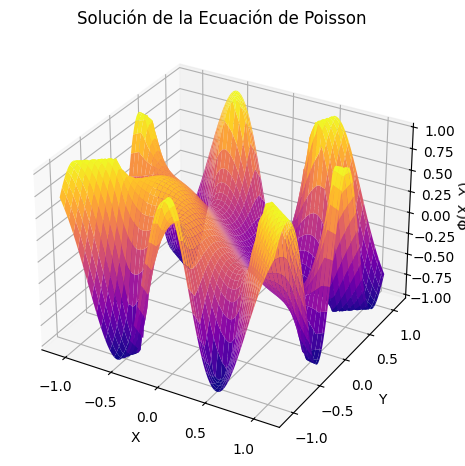

In [58]:
# Crear la figura y el subplot 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(121, projection='3d')

# Usar un colormap que vaya de violeta a rojo
cmap = cm.get_cmap("plasma")
norm = mcolors.Normalize(vmin=np.min(phi), vmax=np.max(phi))

# Graficar la superficie
surf = ax.plot_surface(X, Y, phi, cmap=cmap, norm=norm)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Φ(X, Y)")
ax.set_title("Solución de la Ecuación de Poisson")

plt.savefig('1.png')
plt.show()